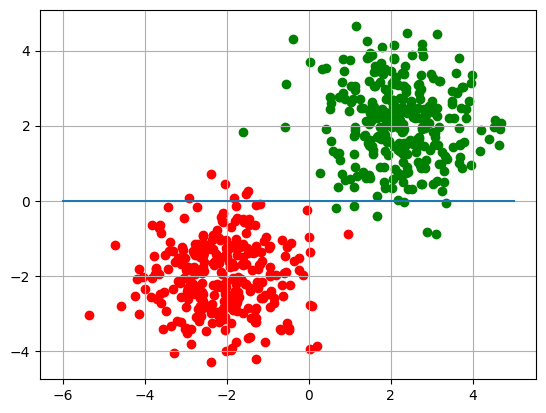

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import function

df = pd.read_csv("unlabelled_data.csv")
df.columns = df.columns.str.replace("-1.885907518189583", "x_axel").str.replace("-1.997407599218205", "y_axel")

point_one = [-6, 5]
point_two = [0, 0]
k = (point_two[1] - point_one[1]) / (point_two[0] - point_one[0])
m = point_one[1] - k * point_one[0]

xo = []
yo = []
xu = []
yu = []
new_data = ""

for x, y in zip(df["x_axel"], df["y_axel"]):
    if function.over_line(k, m, x, y):
        new_data += "0, " + str(x) + ", " + str(y) + "\n"
        xo.append(x)
        yo.append(y)
    else:
        new_data += "1, " + str(x) + ", " + str(y) + "\n"
        xu.append(x)
        yu.append(y)

with open("new_data.csv", "w") as f:
    f.write(new_data)

plt.scatter(xo, yo, color = "red")
plt.scatter(xu, yu, color = "green")

plt.plot(point_one, point_two)
plt.grid(True)
plt.show()


In [21]:
df["values"] = df["x_axel"]

for x, y in zip(df["x_axel"], df["y_axel"]):
    if y > 0:
        df["values"] = df["values"].replace(x, 0)
    else:
        df["values"] = df["values"].replace(x, 1)

df["values"] = df["values"].astype(int)



In [22]:
df.to_csv("labelled_data.csv", index = False)

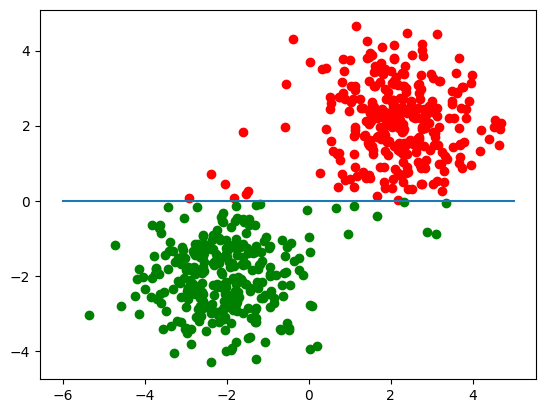

In [23]:
noll_värde = df[df["values"] == 0]
ett_värde = df[df["values"] == 1]

plt.scatter(noll_värde["x_axel"], noll_värde["y_axel"], color = "red")
plt.scatter(ett_värde["x_axel"], ett_värde["y_axel"], color = "green")
plt.plot(point_one, point_two)
plt.show()